## Import packages

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read data

Read the file **sou_rec_pos.pkl** with pandas as DataFrame and the file **seismic_data_source_1000.nc** with xarray as DataSet

In [2]:
sou_rec_pos = pd.read_pickle("sou_rec_pos.pkl")
seismic_data= xr.open_dataset("seismic_data_source_1000.nc")
seismic_data

<xarray.Dataset>
Dimensions:  (twt: 4001, time: 4001, cdp: 1180)
Coordinates:
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp      (cdp) int32 871637 871638 871639 871640 ... 872814 872815 872816
Data variables:
    data     (cdp, time) float32 ...
Attributes: (12/13)
    ns:                  None
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         Niscota_4B.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....
    coord_scalar:        1.0

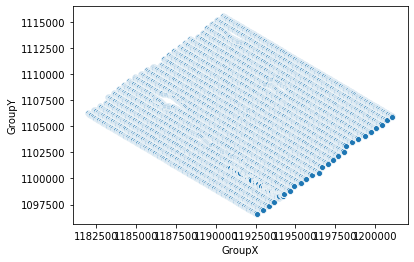

,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1182365,1105911,1181982,1106233,1121,1137,0,133195.117308,1613410.040671,133695.147082,1613428.566994
1,1,1182365,1105911,1182018,1106201,1099,1137,0,133243.281522,1613410.497256,133695.147082,1613428.566994
2,1,1182365,1105911,1182053,1106169,1090,1137,0,133290.704658,1613410.282421,133695.147082,1613428.566994
3,1,1182365,1105911,1182089,1106137,1082,1137,0,133338.868872,1613410.739005,133695.147082,1613428.566994
4,1,1182365,1105911,1182124,1106105,1073,1137,0,133386.292008,1613410.524171,133695.147082,1613428.566994
...,...,...,...,...,...,...,...,...,...,...,...,...
2981934,2933,1198355,1107376,1200942,1106056,323,603,0,147364.797755,1626008.972571,144561.355938,1625250.234816
2981935,2933,1198355,1107376,1200978,1106024,321,603,0,147412.961969,1626009.429156,144561.355938,1625250.234816
2981936,2933,1198355,1107376,1201013,1105992,321,603,0,147460.385105,1626009.214321,144561.355938,1625250.234816
2983819,2935,1198191,1106850,1201049,1105959,320,586,0,147509.220738,1626008.929828,144792.985494,1624750.315074


In [3]:
rec_pos=sou_rec_pos.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=rec_pos, x="GroupX", y="GroupY")
plt.show()
rec_pos

## Create new dimensions
Compute **Azimuth** and **Offset** from sources and receivers positions.

In [4]:
pos_x=np.array(sou_rec_pos['SourceX']-sou_rec_pos['GroupX'], dtype='f')
pos_y=np.array(sou_rec_pos['SourceY']-sou_rec_pos['GroupY'], dtype='f')
azimuth=np.arctan2(-pos_x, pos_y) * 180 / np.pi+180
offset = np.linalg.norm([pos_x,pos_y], axis=0)  
sou_rec_pos['Azimuth']=azimuth
sou_rec_pos['Offset']=offset
sou_rec_pos

,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Offset
0,1,1182365,1105911,1181982,1106233,1121,1137,0,133195.117308,1613410.040671,133695.147082,1613428.566994,49.945190,500.372864
1,1,1182365,1105911,1182018,1106201,1099,1137,0,133243.281522,1613410.497256,133695.147082,1613428.566994,50.113312,452.226715
2,1,1182365,1105911,1182053,1106169,1090,1137,0,133290.704658,1613410.282421,133695.147082,1613428.566994,50.411865,404.855530
3,1,1182365,1105911,1182089,1106137,1082,1137,0,133338.868872,1613410.739005,133695.147082,1613428.566994,50.687988,356.723969
4,1,1182365,1105911,1182124,1106105,1073,1137,0,133386.292008,1613410.524171,133695.147082,1613428.566994,51.166656,309.381653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,3645,1201128,1105871,1200942,1106056,323,319,0,147364.797755,1626008.972571,147626.850767,1625996.757056,45.154434,262.337555
3566874,3645,1201128,1105871,1200978,1106024,321,319,0,147412.961969,1626009.429156,147626.850767,1625996.757056,44.432739,214.263855
3566875,3645,1201128,1105871,1201013,1105992,321,319,0,147460.385105,1626009.214321,147626.850767,1625996.757056,43.543640,166.931122
3566876,3645,1201128,1105871,1201049,1105959,320,319,0,147509.220738,1626008.929828,147626.850767,1625996.757056,41.915192,118.258194


Histogram of the **Azimuth** for the source 1000.

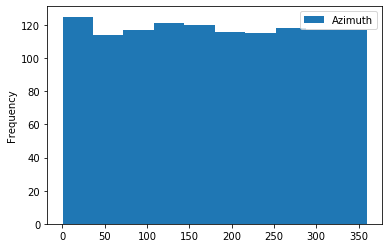

In [5]:
source=1000
shot_pos=sou_rec_pos[sou_rec_pos['EnergySourcePoint']==source]
shot_pos[['Azimuth']].plot.hist()
plt.show()

## Highligth position by azimuth bin
Show receivers fro the source 1000 with azimuth from 90 to 110.

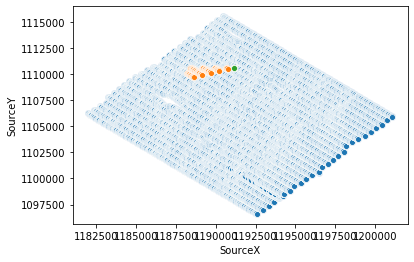

In [6]:
az_1=90 
az_2=110                  #Limit values of azimuth
shot_azimuth_pos=shot_pos[(shot_pos['Azimuth']>az_1)&(shot_pos['Azimuth']<az_2)]
sns.scatterplot(data=sou_rec_pos, x="GroupX", y="GroupY")
sns.scatterplot(data=shot_azimuth_pos, x="GroupX", y="GroupY")
sns.scatterplot(data=shot_azimuth_pos, x="SourceX", y="SourceY")
plt.show()

## Selecting traces for the azimuth bin
Create the azimuth coordinate for the DataSet **seismic_data**

In [7]:
import pickle
with open('inter_topo.pkl', 'rb') as f:
     rbf = pickle.load(f)
x_pts=shot_pos[['SourceX_new','ReceiverX']].to_numpy().astype('f')
y_pts=shot_pos[['SourceY_new','ReceiverY']].to_numpy().astype('f')
xt = np.transpose(np.linspace(x_pts[:,0],x_pts[:,1],10))
yt = np.transpose(np.linspace(y_pts[:,0],y_pts[:,1],10))
zt = rbf(xt,yt)
geodesic = np.sum(np.linalg.norm([np.diff(xt),np.diff(yt),np.diff(zt)], axis=0), axis=1)
shot_pos['Geodesic']=geodesic
shot_pos

/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Offset,Geodesic
871637,1000,1191136,1110640,1188559,1109111,1284,1309,0,136136.843809,1619958.785451,137020.002344,1622822.140302,120.681747,2996.459473,3112.522238
871638,1000,1191136,1110640,1188595,1109080,1329,1309,0,136184.336604,1619959.983113,137020.002344,1622822.140302,121.547081,2981.657471,3083.321909
871639,1000,1191136,1110640,1188631,1109048,1375,1309,0,136232.500818,1619960.439698,137020.002344,1622822.140302,122.437134,2968.078369,3059.462079
871640,1000,1191136,1110640,1188667,1109016,1420,1309,0,136280.665033,1619960.896282,137020.002344,1622822.140302,123.335167,2955.221924,3041.965395
871641,1000,1191136,1110640,1188703,1108984,1429,1309,0,136328.829247,1619961.352867,137020.002344,1622822.140302,124.240814,2943.097900,3026.308619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872812,1000,1191136,1110640,1193763,1111878,1057,1309,0,138135.597686,1625503.412394,137020.002344,1622822.140302,295.232635,2904.095947,2928.895944
872813,1000,1191136,1110640,1193799,1111846,1060,1309,0,138183.7619,1625503.868979,137020.002344,1622822.140302,294.364471,2923.354980,2949.059148
872814,1000,1191136,1110640,1193834,1111813,1058,1309,0,138231.856455,1625502.913066,137020.002344,1622822.140302,293.497772,2941.960693,2969.103499
872815,1000,1191136,1110640,1193870,1111781,1061,1309,0,138280.020669,1625503.36965,137020.002344,1622822.140302,292.652588,2962.539062,2990.309692


In [8]:
seismic_data["azimuth"] = ("azimuth",  shot_pos['Azimuth'])
seismic_data["geodesic"] = ("azimuth",  shot_pos['Geodesic'])
seismic_data["data"] = (("azimuth", "time"), np.array(seismic_data.data))
seismic_data

<xarray.Dataset>
Dimensions:   (twt: 4001, time: 4001, azimuth: 1180, cdp: 1180)
Coordinates:
  * twt       (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp       (cdp) int32 871637 871638 871639 871640 ... 872814 872815 872816
  * azimuth   (azimuth) float32 120.7 121.5 122.4 123.3 ... 293.5 292.7 291.8
Data variables:
    data      (azimuth, time) float32 26.84 25.84 23.84 ... 9.652 10.65 6.652
    geodesic  (azimuth) float64 3.113e+03 3.083e+03 ... 2.99e+03 3.011e+03
Attributes: (12/13)
    ns:                  None
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         Niscota_4B.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....
    coord_scalar:        1.0

Select DataArray **data_azimuth** from the DataSet **seimisc_data** in the azimuth bin.

In [9]:
data = seismic_data.where((seismic_data.azimuth>az_1)&(seismic_data.azimuth<az_2), drop=True)  #Select traces for the azimuth bin
data_azimuth = data.data.sortby('azimuth') #Sort DataArray by azimuth
data_azimuth

<xarray.DataArray 'data' (azimuth: 65, time: 4001)>
array([[  8.409695  ,  -3.5903435 , -10.589903  , ...,  -6.589446  ,
         -0.5901154 ,  -7.5898438 ],
       [ 15.988307  ,  -6.011858  ,  -3.0117245 , ..., -38.012222  ,
         35.988754  ,   9.988281  ],
       [  4.1642447 ,   3.163847  ,  15.164299  , ...,  26.164795  ,
         18.163467  ,  19.164062  ],
       ...,
       [ -2.57061   ,  -6.570118  ,   7.429329  , ...,  -1.5695658 ,
          0.42876887,  -1.5703125 ],
       [  3.1287003 ,  -3.8710003 ,  -3.8710003 , ..., -52.871338  ,
        -54.871475  , -60.871094  ],
       [ -0.7927381 ,   4.2072372 ,  -9.793275  , ...,   1.2070312 ,
          6.2074423 ,  -5.7929688 ]], dtype=float32)
Coordinates:
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * azimuth  (azimuth) float32 90.34 90.55 90.58 90.61 ... 109.1 109.6 109.9

Plot the shot gather foe the azimuth bin sort by azimuth.

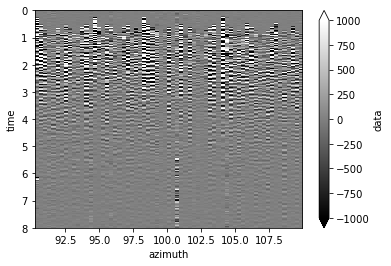

In [10]:
data_azimuth.plot.imshow('azimuth','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper')

## Sort the data by geodesic
Select DataArray **data_geodesic** from the DataSet **data** in the azimuth bin.

In [11]:
data=data.swap_dims({"azimuth": "geodesic"})
data_geodesic = data.data.sortby('geodesic') #Sort DataArray by offset
data_geodesic

<xarray.DataArray 'data' (geodesic: 65, time: 4001)>
array([[ -6.117275  ,  -6.117275  ,  -4.117222  , ...,   0.88266945,
         -3.1167212 ,  -8.117185  ],
       [ 16.121216  ,   8.121343  ,   2.120884  , ...,  -6.8787937 ,
        -18.878708  , -29.878906  ],
       [ -9.644381  ,  -8.644425  ,  -5.644562  , ...,   0.3553915 ,
          5.3553143 ,  13.355469  ],
       ...,
       [ 44.947525  ,  36.948044  ,  36.948044  , ...,  44.948944  ,
         37.9494    ,  26.949219  ],
       [-40.781998  , -31.781235  , -24.782074  , ...,  25.218292  ,
          6.2188272 ,   8.21875   ],
       [-21.762146  , -25.761139  , -19.761536  , ...,  28.23848   ,
         18.238617  ,  23.238281  ]], dtype=float32)
Coordinates:
  * geodesic  (geodesic) float64 453.8 486.0 525.0 ... 3.203e+03 3.236e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
    azimuth   (geodesic) float32 104.1 98.93 94.39 90.34 ... 101.5 100.8 100.0

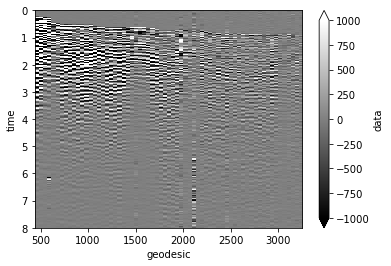

In [12]:
data_geodesic.plot.imshow('geodesic','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper')

Plot the shot gather for the azimuth bin sort by offset.

Text(0, 0.5, 'Phase velocity (m/s)')

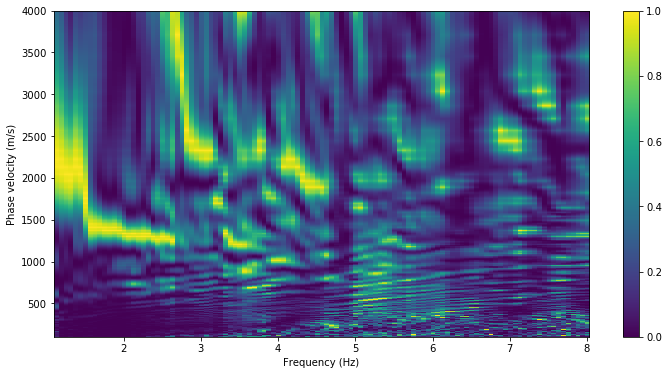

In [14]:
import masw_functions as mf
vmin=100.0 
vmax=4001.0
fmin=1.1
fmax=8.0
pstep=2e-5
Nf=8001
v=np.arange(vmin,vmax)
D=mf.DispersionSpectrum(data_geodesic,v,fmin,fmax,Nf,pstep)
plt.rcParams['figure.figsize'] = [12, 6]
D.plot.imshow(D.dims[1],D.dims[0],cmap='viridis', origin='lower')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (m/s)")

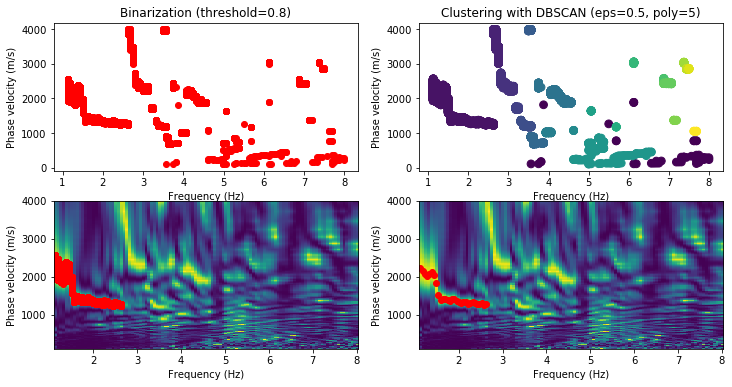

In [15]:
num=30
Xobs=mf.AutomaticPicking(D,threshold=0.9,num,fig=True, reg=False)

In [ ]:
Nh=10
(vsia,hia,zia)=mf.InitialModel(Xobs,Nh)
plt.rcParams['figure.figsize'] = [6, 6]
plt.figure()
plt.step(np.append(vsia,vsia[-1]),zia,label='Initial model',color='blue')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("S-wave velocity (m/s)")
plt.ylabel("Depth (m)")

In [ ]:
rps=2.5
alpha=num
n_iter=20
rhoia=2*np.ones(np.size(vsia))
dh=1.0
(vsfa,vpfa,e)=mf.sw_inversion(Xobs[:,1],Xobs[:,0],vsia,rhoia,hia,rps,n_iter,alpha,dh)

plt.rcParams['figure.figsize'] = [15, 6]
fig, axs = plt.subplots(1,2)
axs[0].step(np.append(vsia,vsia[-1]),zia, color='blue', label='Initial')
axs[0].step(np.append(vsfa,vsfa[-1]),zia, color='red', label='Inversion')
axs[0].set(xlabel='S-wave velocity (m/s)', ylabel='Depth (m)')
axs[0].legend()
axs[0].invert_yaxis()

cRia=mf.forward_dispersion(vsia,rps*vsia,rhoia,hia,Xobs[:,0])
cRfa=mf.forward_dispersion(vsfa,rps*vsfa,rhoia,hia,Xobs[:,0])
axs[1].plot(Xobs[:,0], Xobs[:,1], 'o--', color='black', label='Observed')
axs[1].plot(Xobs[:,0], cRia, 'o--', color='blue', label='Initial')
axs[1].plot(Xobs[:,0], cRfa, 'o--', color='red', label='Inversion')
axs[1].set(xlabel='Frequency (Hz)', ylabel='Phase velocity (m/s)')
axs[1].legend()